In [3]:
%run Data_new.ipynb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

X, y, info, oryginal_isotherms = get_data(40)

oryginal_isotherms: 912
oryginal_bet: 912
oryginal_info: 912 

flat=True, returned one dimension data= [x,y,x,y,x,y,...]
X (912, 80)
y (912,)
info 912
oryginal_isotherms 912
return: X, y, info, oryginal_isotherms


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

size = 40
X,y,info,oryginal = get_data(size,flat=True);
# for e in X[0]:
#     print(e)
y_all_nested = []
for i in range(len(y)):
    y_all_nested.append([y[i],info[i]])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y_all_nested, test_size=0.02, random_state=42) #random_state=42
y_train = [item[0] for item in y_train_nested]
y_train = np.array(y_train).astype(float)
y_test = [item[0] for item in y_test_nested]
y_test = np.array(y_test).astype(float)
# print(y_train)
# X_train = X_train.reshape(X_train.shape[0], -1)
# print(X[0])
#for n in X[0]:
#    print(n)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train[0])
print(len(X_train))
print(len(X_test))

flat=True, returned one dimension data= [x,y,x,y,x,y,...]
X (912, 80)
y (912,)
info 912
oryginal_isotherms 912
return: X, y, info, oryginal_isotherms
893
19


In [10]:
df = initially_preprocessed_data_frame()

In [11]:
df.describe()

,Total_surface_area[m2/g],Total_pore_volume[cm3/g],Micropore_volume[cm3/g],Mesopore_volume[cm3/g],Average_pore_diameter[nm],Impregnation_ratio[agent/char],Burn_off[%],Carbonization_time[h],Carbonization_temperature[stC],Activation_time[h],Activation_temperature[stC]
count,912.000000,762.000000,722.000000,21.000000,121.000000,20.000000,75.000000,210.000000,253.000000,508.000000,699.000000
mean,1049.024019,0.583551,0.394635,0.241086,2.425292,1.675000,41.905333,1.757143,689.130435,2.181197,749.134478
std,673.434869,0.393710,0.272328,0.201097,0.611795,0.819278,24.414483,1.069620,186.494486,3.273415,166.160749
min,1.200000,0.002000,0.002000,0.020000,1.066000,0.830000,0.000000,1.000000,400.000000,0.083000,250.000000
25%,577.150000,0.300000,0.200000,0.056000,2.100000,1.000000,22.500000,1.000000,500.000000,1.000000,600.000000
50%,919.000000,0.490000,0.330000,0.211400,2.280000,1.500000,40.000000,1.000000,700.000000,1.000000,800.000000
75%,1348.000000,0.820000,0.512250,0.320000,2.510360,2.000000,61.000000,2.000000,800.000000,2.000000,900.000000
max,3575.000000,2.450000,1.440000,0.820000,5.630000,4.000000,94.000000,6.000000,1000.000000,45.000000,1400.000000


In [16]:
df_filtered = df.dropna(subset=['Curve_type', 'Total_surface_area[m2/g]']) #his method removes rows with missing values

In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 1009
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Article_name                    849 non-null    object 
 1   Figure_number                   849 non-null    object 
 2   Sample_name                     849 non-null    object 
 3   Total_surface_area[m2/g]        849 non-null    float64
 4   Total_pore_volume[cm3/g]        701 non-null    float64
 5   Micropore_volume[cm3/g]         660 non-null    float64
 6   Mesopore_volume[cm3/g]          10 non-null     float64
 7   Average_pore_diameter[nm]       115 non-null    float64
 8   Impregnation_ratio[agent/char]  20 non-null     float64
 9   Activation_type                 33 non-null     object 
 10  Burn_off[%]                     55 non-null     float64
 11  Carbonization_time[h]           193 non-null    float64
 12  Carbonization_temperature[stC]  228 non-

In [18]:
df_filtered["Curve_type"].value_counts()

Curve_type
I        484
I_IV     111
I_II      96
II        78
IV        77
II_IV      3
Name: count, dtype: int64

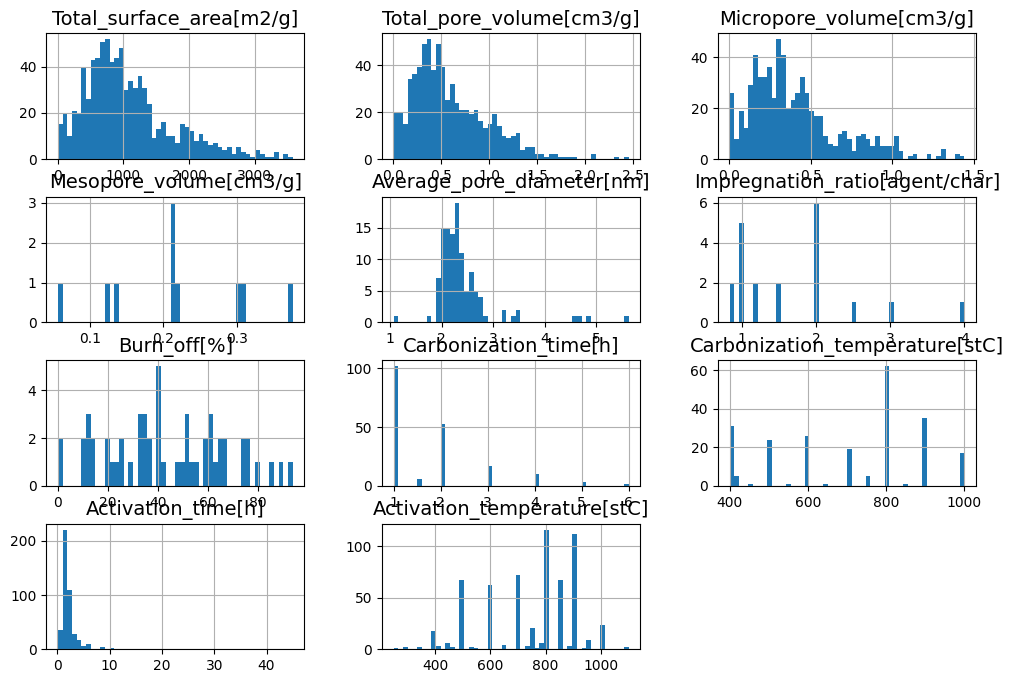

In [19]:
import matplotlib.pyplot as plt

# the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


df_filtered.hist(bins=50, figsize=(12, 8))
plt.show()

In [23]:
curve_cat = df_filtered[["Curve_type"]]
curve_cat.head()

,Curve_type
0,I_II
1,I_II
2,I_II
3,I_II
4,I_II


# Encoding and model training

In [104]:
df_filtered = df.dropna(subset=['Curve_type', 'Total_surface_area[m2/g]','Total_pore_volume[cm3/g]', 'Micropore_volume[cm3/g]']) #his method removes rows with missing values
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 39 to 971
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Article_name                    611 non-null    object 
 1   Figure_number                   611 non-null    object 
 2   Sample_name                     611 non-null    object 
 3   Total_surface_area[m2/g]        611 non-null    float64
 4   Total_pore_volume[cm3/g]        611 non-null    float64
 5   Micropore_volume[cm3/g]         611 non-null    float64
 6   Mesopore_volume[cm3/g]          0 non-null      float64
 7   Average_pore_diameter[nm]       92 non-null     float64
 8   Impregnation_ratio[agent/char]  5 non-null      float64
 9   Activation_type                 19 non-null     object 
 10  Burn_off[%]                     40 non-null     float64
 11  Carbonization_time[h]           184 non-null    float64
 12  Carbonization_temperature[stC]  207 non-

In [105]:
from sklearn.preprocessing import OneHotEncoder

categorial_encoder = OneHotEncoder(sparse_output = False) # sparse=False to return a dense array instead of sparse matrix
curve_cat = df_filtered[["Curve_type"]]
encode_data = categorial_encoder.fit_transform(curve_cat) # Fit and transform the 'category' column
encode_data_in_df_format = pd.DataFrame(encode_data, columns=categorial_encoder.get_feature_names_out())  # Convert the encoded data to DataFrame (optional)

categories = categorial_encoder.categories_[0]
print(categories)

['I' 'II' 'IV' 'I_II' 'I_IV']


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example using one-hot encoded data
X = df_filtered[["Total_surface_area[m2/g]", "Total_pore_volume[cm3/g]", 'Micropore_volume[cm3/g]']].to_numpy()  # Assuming "target" is your target variable
# X = X.reshape(-1, 1)
# print(X)

y = encode_data_in_df_format  # Replace with your actual target variable
y = y.to_numpy()
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
for i in range(10):
    probka = [X_test[i]]
    # print(probka)
    # print(model.predict(probka))
    predicted_category_index = np.argmax(model.predict(probka)) 
    # print(categories[predicted_category_index])
    print(f'Dla probki {probka} ---> {categories[predicted_category_index]}')

Dla probki [array([9.762e+02, 4.400e-01, 3.700e-01])] ---> I
Dla probki [array([2.227e+03, 9.500e-01, 5.900e-01])] ---> I
Dla probki [array([3.9e+02, 1.8e-01, 1.9e-01])] ---> I
Dla probki [array([1.101e+03, 7.800e-01, 5.506e-01])] ---> I_II
Dla probki [array([6.31e+02, 2.70e-01, 2.30e-01])] ---> I
Dla probki [array([8.152e+02, 3.700e-01, 3.200e-01])] ---> II
Dla probki [array([1.07522e+03, 1.08300e+00, 5.13000e-01])] ---> I
Dla probki [array([1.485e+03, 8.750e-01, 1.890e-01])] ---> I
Dla probki [array([1.761e+03, 1.102e+00, 8.773e-01])] ---> I
Dla probki [array([1.25e+03, 6.40e-01, 4.90e-01])] ---> I


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Example using one-hot encoded data
X = df_filtered[["Total_surface_area[m2/g]", "Total_pore_volume[cm3/g]", 'Micropore_volume[cm3/g]']].to_numpy()  # Assuming "target" is your target variable
# X = X.reshape(-1, 1)
# print(X)

y = encode_data_in_df_format  # Replace with your actual target variable
y = y.to_numpy()
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a model
DecisionTreemodel = DecisionTreeClassifier()
DecisionTreemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [110]:
for i in range(10):
    probka = [X_test[i]]
    # print(probka)
    # print(model.predict(probka))
    predicted_category_index = np.argmax(DecisionTreemodel.predict(probka)) 
    # print(categories[predicted_category_index])
    print(f'Dla probki {probka} ---> {categories[predicted_category_index]}')

Dla probki [array([9.762e+02, 4.400e-01, 3.700e-01])] ---> I
Dla probki [array([2.227e+03, 9.500e-01, 5.900e-01])] ---> I
Dla probki [array([3.9e+02, 1.8e-01, 1.9e-01])] ---> I
Dla probki [array([1.101e+03, 7.800e-01, 5.506e-01])] ---> I
Dla probki [array([6.31e+02, 2.70e-01, 2.30e-01])] ---> I
Dla probki [array([8.152e+02, 3.700e-01, 3.200e-01])] ---> II
Dla probki [array([1.07522e+03, 1.08300e+00, 5.13000e-01])] ---> II
Dla probki [array([1.485e+03, 8.750e-01, 1.890e-01])] ---> IV
Dla probki [array([1.761e+03, 1.102e+00, 8.773e-01])] ---> I_IV
Dla probki [array([1.25e+03, 6.40e-01, 4.90e-01])] ---> I


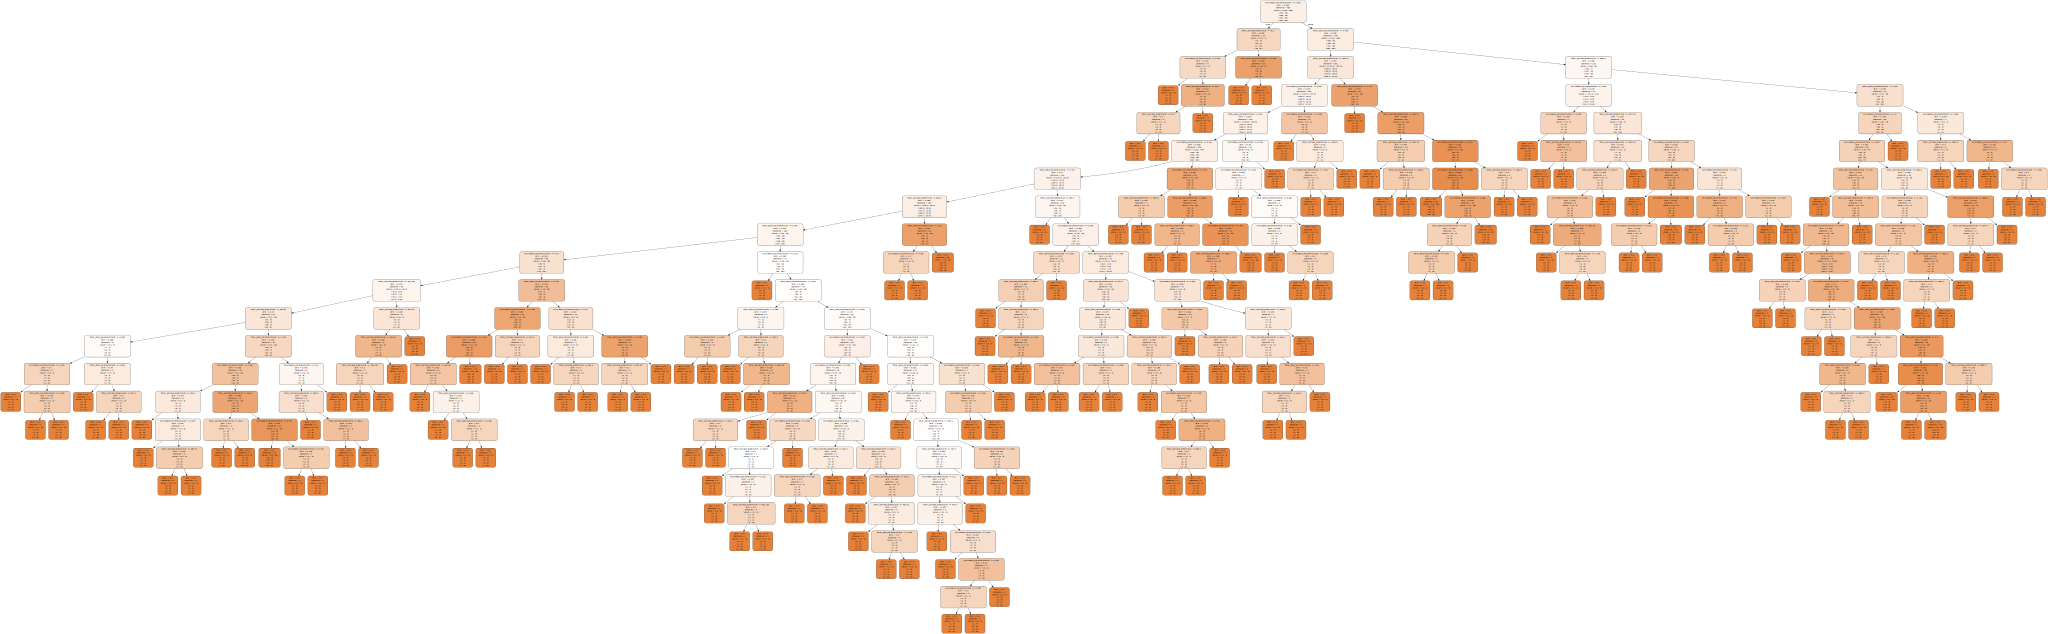

In [115]:
from sklearn.tree import export_graphviz

export_graphviz(
        DecisionTreemodel,
        out_file=str("test.dot"),  # path differs in the book
        feature_names=["Total_surface_area[m2/g]", "Total_pore_volume[cm3/g]", 'Micropore_volume[cm3/g]'],
        class_names=categories,
        rounded=True,
        filled=True
    )

from graphviz import Source
Source.from_file("test.dot")  

In [25]:
cat_encoder.categories_

[array(['I', 'II', 'II_IV', 'IV', 'I_II', 'I_IV'], dtype=object)]

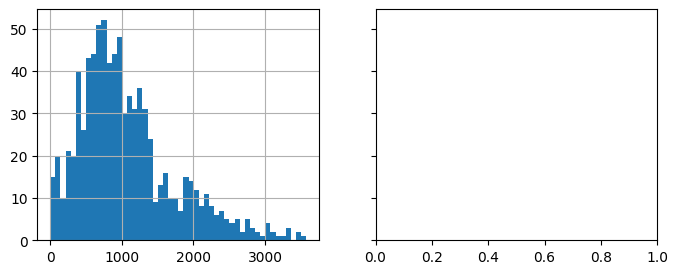

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_filtered["Total_surface_area[m2/g]"].hist(ax=axs[0], bins=50)
plt.show()